# Text Classifier Implementation

In [140]:
import pandas as pd

In [141]:
filepath_dict = {'yelp': 'yelp_labelled.txt',
                'amazon': 'amazon_cells_labelled.txt',
                'imdb': 'imdb_labelled.txt'}

## Converting text files into CSV files

In [142]:
df_list = []

for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)

## Concatenate CSV files into one file contain all data

In [143]:
df = pd.concat(df_list)

In [144]:
df

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb


## Build the training model for each data source

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
df_yelp = df[df['source']=='yelp']
df_yelp.head(5)

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [147]:
X = df_yelp['sentence'].values
Y = df_yelp['label'].values
X[:5] , Y[:5]

(array(['Wow... Loved this place.', 'Crust is not good.',
        'Not tasty and the texture was just nasty.',
        'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
        'The selection on the menu was great and so were the prices.'],
       dtype=object),
 array([1, 0, 0, 1, 1]))

In [148]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

## Shape the data in an acceptable shape by Regression Model

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

In [150]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [151]:
transformed_x_train = vectorizer.transform(x_train)
transformed_x_test = vectorizer.transform(x_test)
transformed_x_train

<750x1724 sparse matrix of type '<class 'numpy.int64'>'
	with 7422 stored elements in Compressed Sparse Row format>

## Train/classify the data using Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
classifier = LogisticRegression()
classifier.fit(transformed_x_train, y_train)

LogisticRegression()

In [154]:
score = classifier.score(transformed_x_test, y_test)
score

0.808

## Testing Keras

In [155]:
from keras.models import Sequential
from keras import layers

In [156]:
input_dim = transformed_x_train.shape[1]
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [157]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [158]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                17250     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,261
Trainable params: 17,261
Non-trainable params: 0
_________________________________________________________________


In [159]:
history = model.fit(transformed_x_train, y_train, epochs=100, verbose=False, validation_data=(transformed_x_test, y_test), batch_size=10)

/home/mohammad/machine-learning/.venv/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


In [160]:
from keras.backend import clear_session
clear_session()

In [161]:
loss, accuracy = model.evaluate(transformed_x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(transformed_x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7880


In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

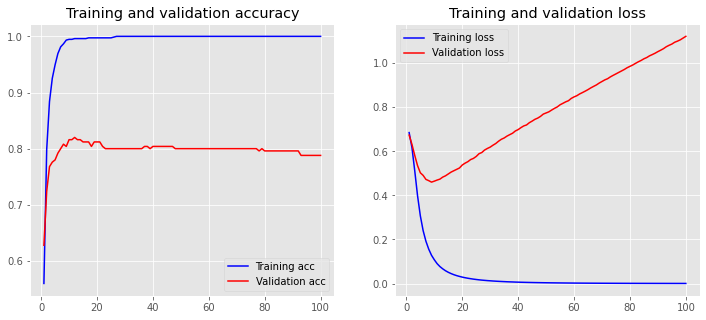

In [163]:
plot_history(history)

## Apply this on the rest of the data ( 'amazon' 'imdb' )

In [164]:
amazon = df[df['source']=='amazon']
X = amazon['sentence'].values
Y = amazon['label'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=75)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
transformed_x_train = vectorizer.transform(x_train)
transformed_x_test = vectorizer.transform(x_test)
classifier = LogisticRegression()
classifier.fit(transformed_x_train, y_train)
score = classifier.score(transformed_x_test, y_test)
score

0.836

In [165]:
imdb = df[df['source']=='imdb']
X = imdb['sentence'].values
Y = imdb['label'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=75)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
transformed_x_train = vectorizer.transform(x_train)
transformed_x_test = vectorizer.transform(x_test)
classifier = LogisticRegression()
classifier.fit(transformed_x_train, y_train)
score = classifier.score(transformed_x_test, y_test)
score

0.8288770053475936